In [ ]:
%cd /
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ ./mydrive
!ls mydrive

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link './mydrive/My Drive': File exists
'Colab Notebooks'		      pliki_zajęć
'Materiały z Zajęć(Obrazy Cyfrowe)'   PrawaStudentaUPe05102021.pdf
'MATURA(POLSKI)'		     'Zdjęcia(Moje)'
'My Drive'			      Zdjęcia.rar


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import skimage,imutils

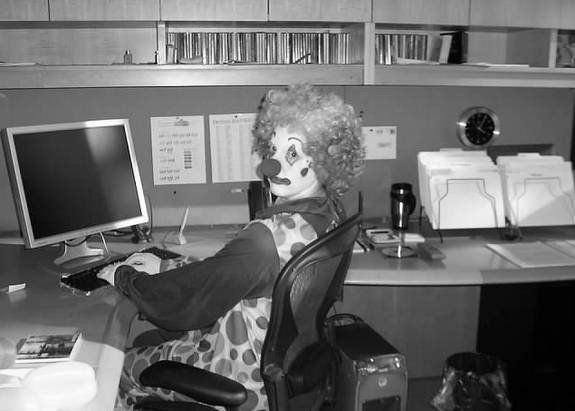

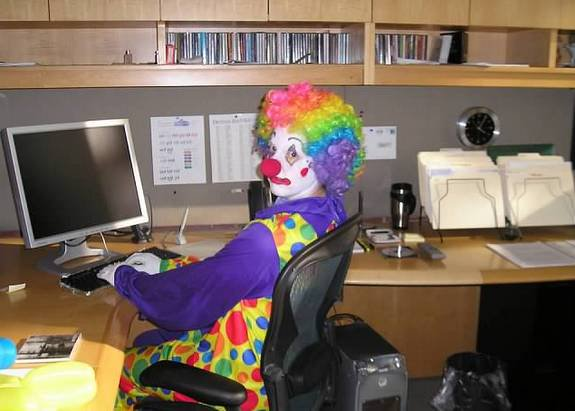

In [ ]:
img = cv2.imread('/mydrive/Zdjęcia(Moje)/me.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_gray)
cv2_imshow(img)

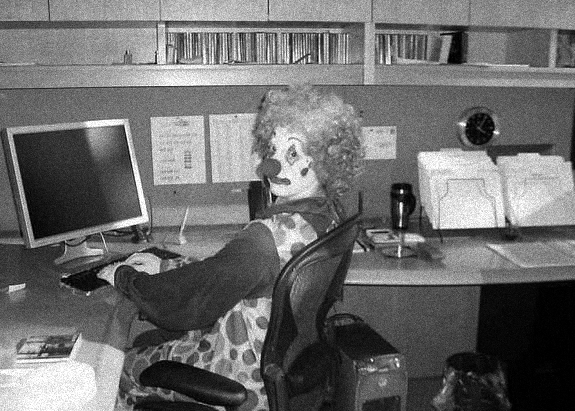

In [ ]:
noise_p = skimage.util.random_noise(img_gray, mode="poisson")
img_p = np.array(255*noise_p, dtype=np.uint8)
cv2_imshow(img_p)

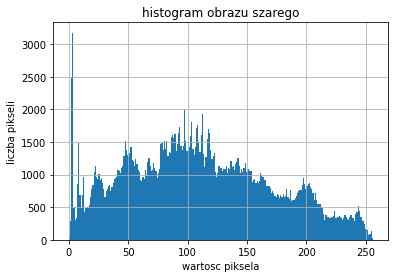

In [ ]:
plt.figure()
plt.hist(img_gray.ravel(), 256, [0,256])
plt.title("histogram obrazu szarego")
plt.xlabel("wartosc piksela")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.show()

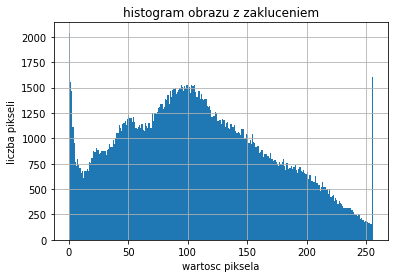

In [ ]:
plt.figure()
plt.hist(img_p.ravel(), 256, [0,256])
plt.title("histogram obrazu z zakluceniem")
plt.xlabel("wartosc piksela")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.show()

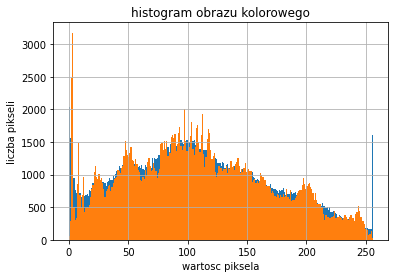

In [ ]:
plt.figure()
plt.hist(img_p.ravel(), 256, [0,256])
plt.hist(img_gray.ravel(), 256, [0,256])
plt.title("histogram obrazu kolorowego")
plt.xlabel("wartosc piksela")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.show()

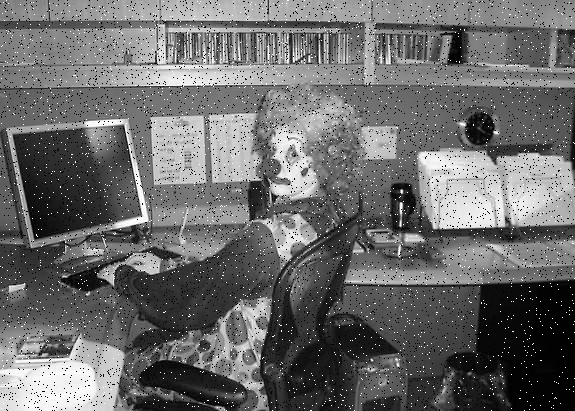

In [ ]:
noise_sp = skimage.util.random_noise(img_gray, mode="s&p", salt_vs_pepper=0.3)
img_sp = np.array(255*noise_sp, dtype=np.uint8)
cv2_imshow(img_sp)

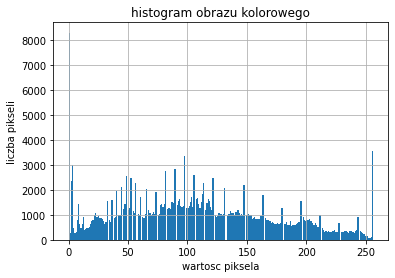

In [ ]:
plt.figure()
plt.hist(img_sp.ravel(), 256, [0,256])
plt.title("histogram obrazu kolorowego")
plt.xlabel("wartosc piksela")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.show()

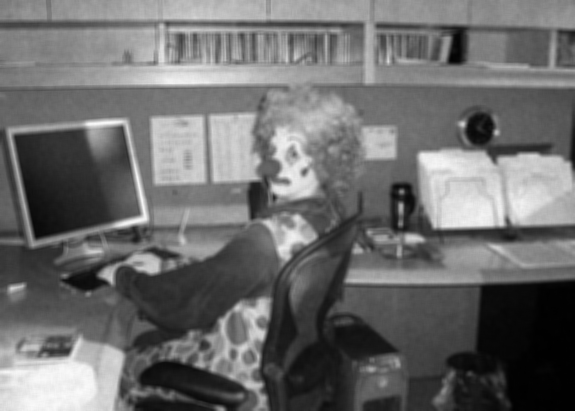

In [ ]:
mask = np.ones((5,5), dtype = np.float32)/25

img_f2d = cv2.filter2D(img_p, -1, kernel = mask)
cv2_imshow(img_f2d)

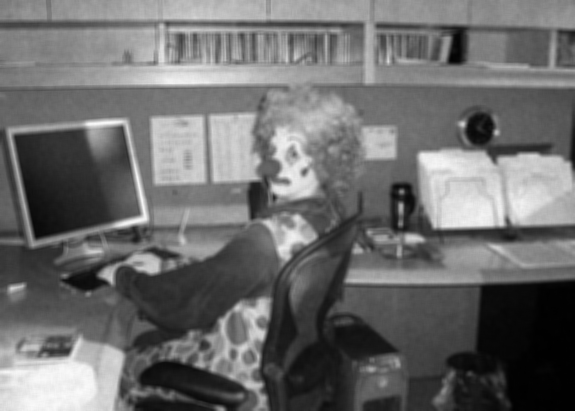

In [ ]:
img_fb = cv2.blur(img_p, (5,5))

cv2_imshow(img_fb)

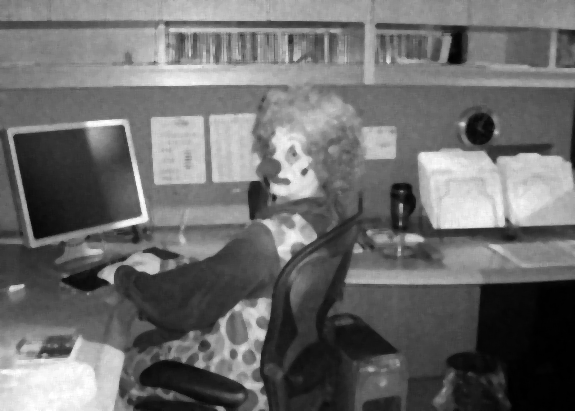

In [ ]:
img_fmb = cv2.medianBlur(img_p, 5)
cv2_imshow(img_fmb)

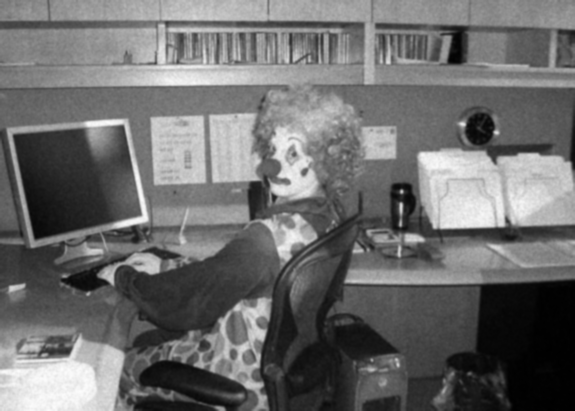

In [ ]:
img_fgb = cv2.GaussianBlur(img_p, (5,5), 1)
cv2_imshow(img_fgb)

In [ ]:
mask_2 = np.ones((3,3), dtype = np.int8)/10
mask_2[0] = 0
mask_2[0][1] = 1
mask_2[2] = 0
mask_2[2][1] = 1
print(mask_2)

[[0.  1.  0. ]
 [0.1 0.1 0.1]
 [0.  1.  0. ]]


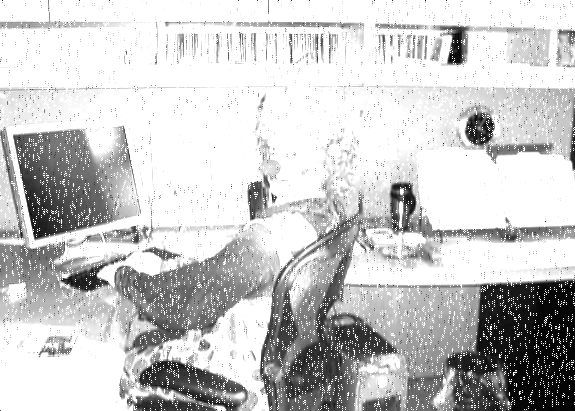

In [ ]:
noise_sp = skimage.util.random_noise(img_gray, mode="s&p", salt_vs_pepper=0.8)
img_p2 = np.array(255*noise_sp, dtype=np.uint8)
img_2f2d = cv2.filter2D(img_p2, -1, kernel = mask_2)
cv2_imshow(img_2f2d)

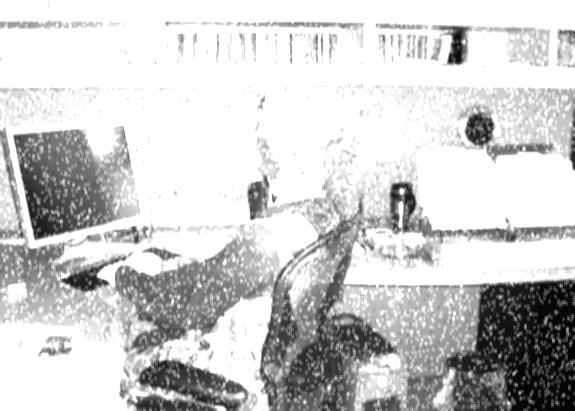

In [ ]:
img_fgb2 = cv2.GaussianBlur(img_p2, (3,3), 2)
img_2f2d1 = cv2.filter2D(img_fgb2, -1, kernel = mask_2)

cv2_imshow(img_2f2d1)